In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Imports

In [2]:
import sys
sys.executable

'/Users/tudorl/Documents/workspace/personal/dtreeviz/venv/bin/python'

In [3]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_importance, plot_tree, plotting

from dtreeviz import trees 
from dtreeviz import treeviz

import graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import pandas as pd
import numpy as np
from dtreeviz.models.shadow_decision_tree import ShadowDecTree3
from dtreeviz.models.xgb_decision_tree import ShadowXGBDTree
from dtreeviz import treeviz
from dtreeviz import exceptions

In [4]:
treeviz.add(1,2)

AttributeError: module 'dtreeviz.treeviz' has no attribute 'add'

In [5]:
pd.options.display.max_rows = 999

# Train

In [6]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [7]:
dtrain = xgb.DMatrix(dataset[features], dataset[target])

In [8]:
params = {"max_depth":6, "eta":0.05, "objective":"binary:logistic", "subsample":1}
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=8)

In [9]:
xgb_model.trees_to_dataframe().query("Tree == 0")

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
0,0,0,0-0,Sex_label,1.000000,0-1,0-2,0-1,246.604279,222.75
1,0,1,0-1,Pclass,3.000000,0-3,0-4,0-3,60.127525,78.50
2,0,2,0-2,Cabin_label,4.000000,0-5,0-6,0-5,29.516968,144.25
3,0,3,0-3,Leaf,NaN,NaN,NaN,NaN,0.087356,42.50
4,0,4,0-4,Fare,23.350000,0-7,0-8,0-7,17.870434,36.00
5,0,5,0-5,Age,3.500000,0-9,0-10,0-9,14.429703,118.25
6,0,6,0-6,Age,17.500000,0-11,0-12,0-11,8.358520,26.00
7,0,7,0-7,Embarked_label,2.000000,0-13,0-14,0-13,4.715125,29.25
8,0,8,0-8,Leaf,NaN,NaN,NaN,NaN,-0.067742,6.75
9,0,9,0-9,Fare,20.825001,0-15,0-16,0-15,3.044444,3.50


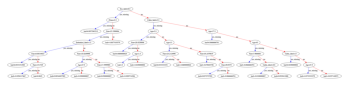

In [10]:
# rcParams['figure.figsize'] = 50,30
plot_tree(xgb_model)

# save the model

In [12]:
import joblib
# joblib.dump(xgb_model, "xgb_model")

# Init shadow tree

In [11]:
d = dataset[features+ [target]].iloc[:800]
d_matrix = xgb.DMatrix(d)

In [12]:
xgb_shadow = ShadowXGBDTree(xgb_model, 1, d[features], d[target], features, target, class_names=[0, 1])

# Parameters meaning
- cover https://stackoverflow.com/questions/33520460/how-is-xgboost-cover-calculated
- https://rdrr.io/cran/xgboost/man/xgb.model.dt.tree.html
- https://eli5.readthedocs.io/en/latest/tutorials/index.html

## left, right children

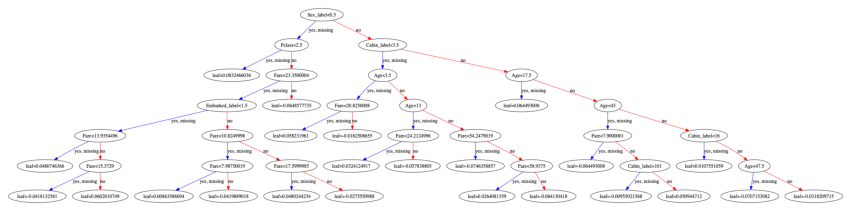

In [16]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model, num_trees=1)

In [17]:
[node.id for node in xgb_shadow.internal]

[22,
 13,
 23,
 24,
 14,
 7,
 4,
 1,
 9,
 17,
 28,
 18,
 10,
 5,
 30,
 19,
 32,
 20,
 12,
 6,
 2,
 0]

In [18]:
[node.id for node in xgb_shadow.leaves]

[3,
 21,
 33,
 34,
 35,
 36,
 37,
 38,
 8,
 15,
 16,
 25,
 26,
 27,
 39,
 40,
 11,
 29,
 41,
 42,
 31,
 43,
 44]

## Node split/threshold

In [19]:
??plot_tree

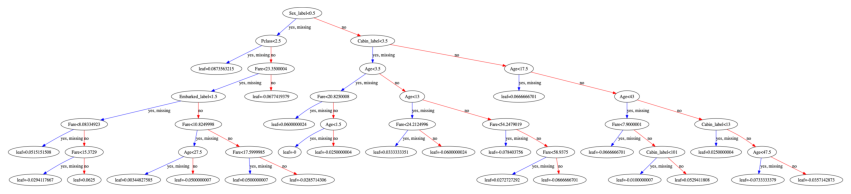

In [20]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model, num_trees=0)

In [21]:
#??xgb_model.get_dump

In [22]:
xgb_model.get_dump(dump_format="text")[1]

'0:[Sex_label<1] yes=1,no=2,missing=1\n\t1:[Pclass<3] yes=3,no=4,missing=3\n\t\t3:leaf=0.0832466036\n\t\t4:[Fare<23.3500004] yes=7,no=8,missing=7\n\t\t\t7:[Embarked_label<2] yes=13,no=14,missing=13\n\t\t\t\t13:[Fare<13.9354496] yes=21,no=22,missing=21\n\t\t\t\t\t21:leaf=0.0480746366\n\t\t\t\t\t22:[Fare<15.3729] yes=33,no=34,missing=33\n\t\t\t\t\t\t33:leaf=-0.0418132581\n\t\t\t\t\t\t34:leaf=0.0602010749\n\t\t\t\t14:[Fare<10.8249998] yes=23,no=24,missing=23\n\t\t\t\t\t23:[Fare<7.98750019] yes=35,no=36,missing=35\n\t\t\t\t\t\t35:leaf=0.00863588694\n\t\t\t\t\t\t36:leaf=-0.0419889018\n\t\t\t\t\t24:[Fare<17.5999985] yes=37,no=38,missing=37\n\t\t\t\t\t\t37:leaf=0.0480244234\n\t\t\t\t\t\t38:leaf=-0.0275550988\n\t\t\t8:leaf=-0.0648577735\n\t2:[Cabin_label<4] yes=5,no=6,missing=5\n\t\t5:[Age<3.5] yes=9,no=10,missing=9\n\t\t\t9:[Fare<20.8250008] yes=15,no=16,missing=15\n\t\t\t\t15:leaf=0.058231961\n\t\t\t\t16:leaf=-0.0162508655\n\t\t\t10:[Age<13] yes=17,no=18,missing=17\n\t\t\t\t17:[Fare<24.21249

In [23]:
xgb_model.get_dump(dump_format="json")[1]

'  { "nodeid": 0, "depth": 0, "split": "Sex_label", "split_condition": 1, "yes": 1, "no": 2, "missing": 1 , "children": [\n    { "nodeid": 1, "depth": 1, "split": "Pclass", "split_condition": 3, "yes": 3, "no": 4, "missing": 3 , "children": [\n      { "nodeid": 3, "leaf": 0.0832466036 }, \n      { "nodeid": 4, "depth": 2, "split": "Fare", "split_condition": 23.3500004, "yes": 7, "no": 8, "missing": 7 , "children": [\n        { "nodeid": 7, "depth": 3, "split": "Embarked_label", "split_condition": 2, "yes": 13, "no": 14, "missing": 13 , "children": [\n          { "nodeid": 13, "depth": 4, "split": "Fare", "split_condition": 13.9354496, "yes": 21, "no": 22, "missing": 21 , "children": [\n            { "nodeid": 21, "leaf": 0.0480746366 }, \n            { "nodeid": 22, "depth": 5, "split": "Fare", "split_condition": 15.3729, "yes": 33, "no": 34, "missing": 33 , "children": [\n              { "nodeid": 33, "leaf": -0.0418132581 }, \n              { "nodeid": 34, "leaf": 0.0602010749 }\n   

In [24]:
xgb_model.get_dump(dump_format="dot")[1]

'digraph {\n    graph [ rankdir=TB ]\n\n    0 [ label="Sex_label<0.5" ]\n    0 -> 1 [label="yes, missing" color="#0000FF"]\n    0 -> 2 [label="no" color="#FF0000"]\n\n    1 [ label="Pclass<2.5" ]\n    1 -> 3 [label="yes, missing" color="#0000FF"]\n    1 -> 4 [label="no" color="#FF0000"]\n\n    3 [ label="leaf=0.0832466036" ]\n\n    4 [ label="Fare<23.3500004" ]\n    4 -> 7 [label="yes, missing" color="#0000FF"]\n    4 -> 8 [label="no" color="#FF0000"]\n\n    7 [ label="Embarked_label<1.5" ]\n    7 -> 13 [label="yes, missing" color="#0000FF"]\n    7 -> 14 [label="no" color="#FF0000"]\n\n    13 [ label="Fare<13.9354496" ]\n    13 -> 21 [label="yes, missing" color="#0000FF"]\n    13 -> 22 [label="no" color="#FF0000"]\n\n    21 [ label="leaf=0.0480746366" ]\n\n    22 [ label="Fare<15.3729" ]\n    22 -> 33 [label="yes, missing" color="#0000FF"]\n    22 -> 34 [label="no" color="#FF0000"]\n\n    33 [ label="leaf=-0.0418132581" ]\n\n    34 [ label="leaf=0.0602010749" ]\n\n    14 [ label="Fare<

In [25]:
xgb_model.trees_to_dataframe().query(f"Tree ==1")

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
47,1,0,1-0,Sex_label,1.000000,1-1,1-2,1-1,223.290298,222.464722
48,1,1,1-1,Pclass,3.000000,1-3,1-4,1-3,54.554695,78.397942
49,1,2,1-2,Cabin_label,4.000000,1-5,1-6,1-5,26.678604,144.066788
50,1,3,1-3,Leaf,NaN,NaN,NaN,NaN,0.083247,42.419022
51,1,4,1-4,Fare,23.350000,1-7,1-8,1-7,16.357407,35.978924
52,1,5,1-5,Age,3.500000,1-9,1-10,1-9,13.191422,118.079491
53,1,6,1-6,Age,17.500000,1-11,1-12,1-11,7.789162,25.987295
54,1,7,1-7,Embarked_label,2.000000,1-13,1-14,1-13,4.343054,29.236660
55,1,8,1-8,Leaf,NaN,NaN,NaN,NaN,-0.064858,6.742262
56,1,9,1-9,Fare,20.825001,1-15,1-16,1-15,2.873673,3.498495


In [26]:
xgb_shadow._get_column_value("Split")

array([  1.        ,   3.        ,   4.        ,          nan,
        23.3500004 ,   3.5       ,  17.5       ,   2.        ,
                nan,  20.8250008 ,  13.        ,          nan,
        43.        ,  13.9354496 ,  10.8249998 ,          nan,
                nan,  24.2124996 ,  54.2479019 ,   7.9000001 ,
        16.        ,          nan,  15.3729    ,   7.98750019,
        17.5999985 ,          nan,          nan,          nan,
        58.9375    ,          nan, 101.        ,          nan,
        47.5       ,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan])

In [27]:
[node.split() for node in xgb_shadow.leaves], [node.split() for node in xgb_shadow.internal]

([-2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2,
  -2],
 [15.3729,
  13.9354496,
  7.98750019,
  17.5999985,
  10.8249998,
  2.0,
  23.3500004,
  3.0,
  20.8250008,
  24.2124996,
  58.9375,
  54.2479019,
  13.0,
  3.5,
  101.0,
  7.9000001,
  47.5,
  16.0,
  43.0,
  17.5,
  4.0,
  1.0])

In [28]:
xgb_shadow.get_node_split(0)

1.0

## Node feature

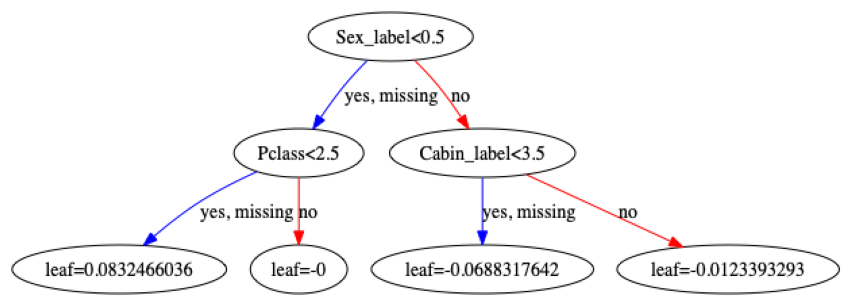

In [20]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model, num_trees=1)

In [165]:
xgb_model.feature_names

['Pclass', 'Age', 'Fare', 'Sex_label', 'Cabin_label', 'Embarked_label']

In [166]:
[(node.id, node.feature()) for node in xgb_shadow.leaves], [(node.id, node.feature()) for node in xgb_shadow.internal]

([(3, -2), (7, -2), (8, -2), (9, -2), (10, -2), (11, -2), (12, -2)],
 [(4, 2), (1, 0), (5, 1), (6, 1), (2, 4), (0, 3)])

## node to samples

In [168]:
xgb_shadow.get_node_samples()

defaultdict(list,
            {10: [0, 4, 5, 12, 13, 17],
             5: [0, 4, 5, 7, 12, 13, 16, 17],
             2: [0, 4, 5, 6, 7, 12, 13, 16, 17],
             0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19],
             3: [1, 3, 9, 11, 15],
             1: [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19],
             7: [2, 8, 10, 14, 18, 19],
             4: [2, 8, 10, 14, 18, 19],
             12: [6],
             6: [6],
             9: [7, 16]})

In [171]:
xgb_shadow.get_node_samples()[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## Node nsample

In [173]:
[(node.id, node.nsamples()) for node in xgb_shadow.leaves], [(node.id, node.nsamples()) for node in xgb_shadow.internal]


([(3, 5), (7, 6), (8, 0), (9, 2), (10, 6), (11, 0), (12, 1)],
 [(4, 6), (1, 11), (5, 8), (6, 1), (2, 9), (0, 20)])

## n_sample_classes

In [201]:
[node.n_sample_classes() for node in xgb_shadow.leaves]

[[0, 5], [2, 4], [0, 0], [2, 0], [5, 1], [0, 0], [1, 0]]

# Visualisations classifier

## viz_leaf_samples

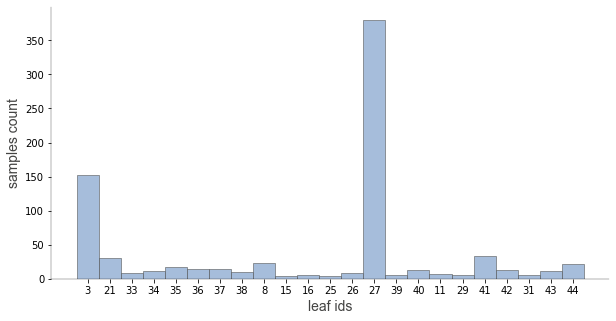

In [13]:
treeviz.viz_leaf_samples(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1)

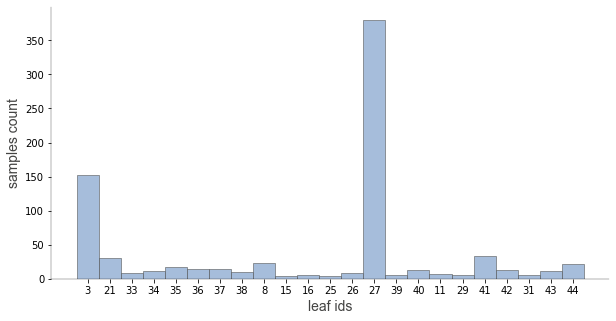

In [14]:
treeviz.viz_leaf_samples(xgb_shadow)

## ctreeviz_leaf_samples

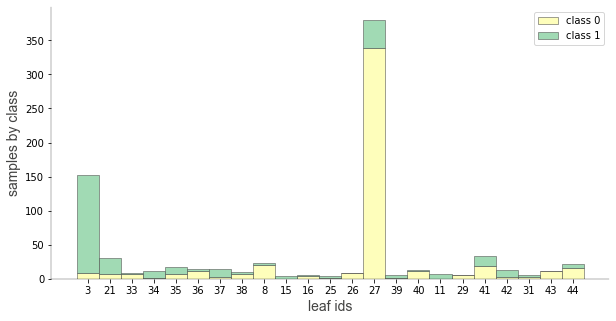

In [15]:
treeviz.ctreeviz_leaf_samples(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1  )

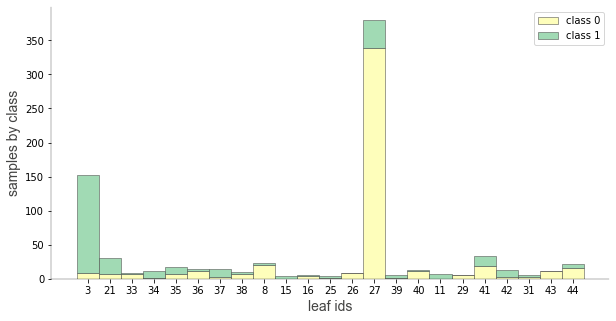

In [16]:
treeviz.ctreeviz_leaf_samples(xgb_shadow)

## dtreeviz

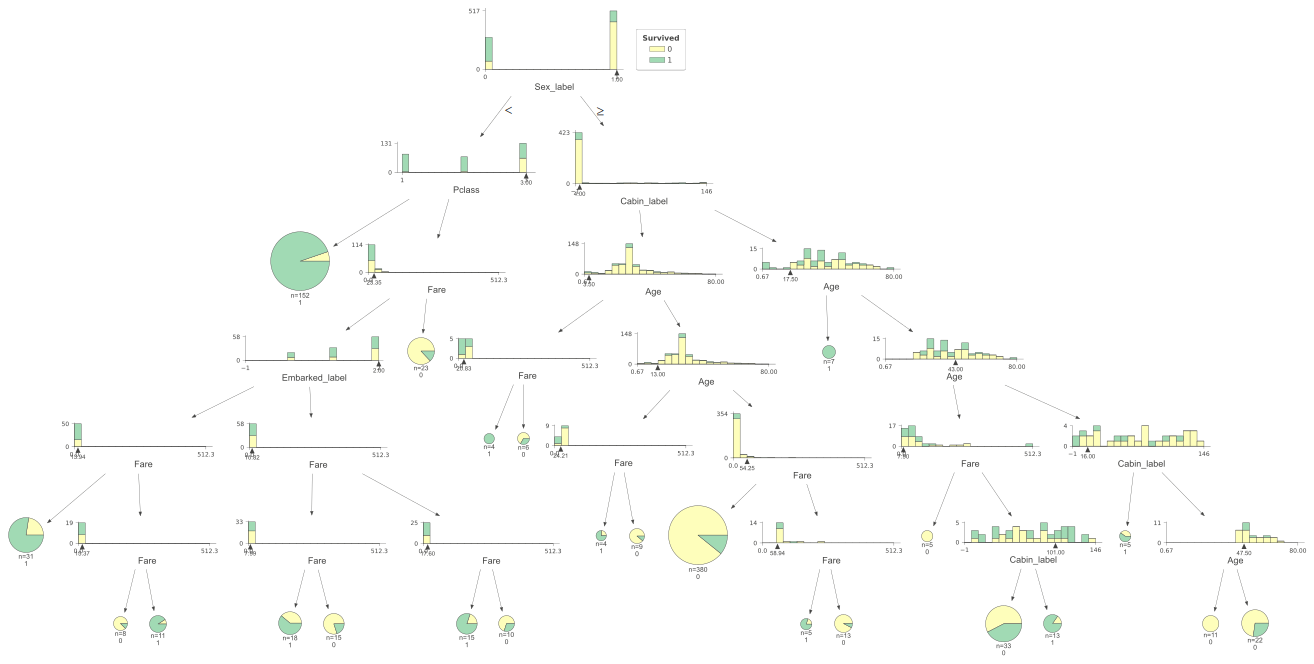

In [17]:
treeviz.dtreeviz(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1)

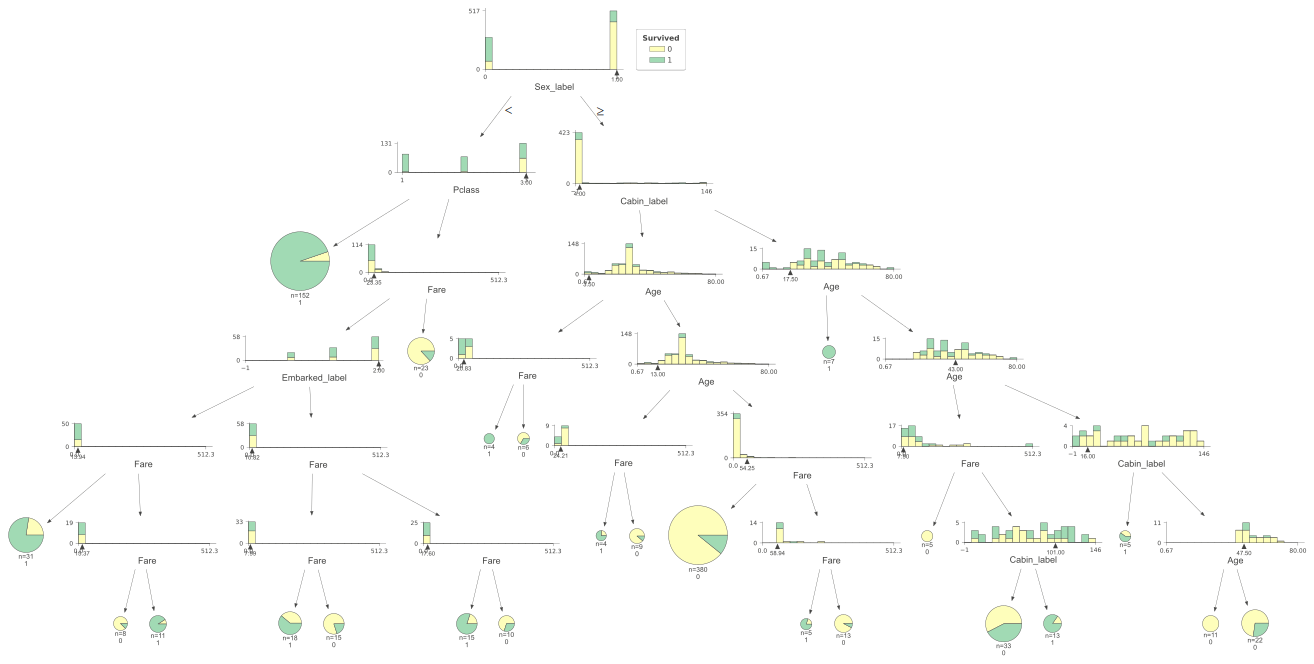

In [19]:
treeviz.dtreeviz(xgb_shadow)

## describe_node_sample

In [20]:
d[features]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
0,3,22.000000,7.2500,1,-1,2
1,1,38.000000,71.2833,0,81,0
2,3,26.000000,7.9250,0,-1,2
3,1,35.000000,53.1000,0,55,2
4,3,35.000000,8.0500,1,-1,2
5,3,29.699118,8.4583,1,-1,1
6,1,54.000000,51.8625,1,129,2
7,3,2.000000,21.0750,1,-1,2
8,3,27.000000,11.1333,0,-1,2
9,2,14.000000,30.0708,0,-1,0


In [21]:
treeviz.describe_node_sample(xgb_model, 1, d[features], features, tree_index=1)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,283.000000,283.000000,283.000000,283.0,283.000000,283.000000
mean,2.173145,27.953908,45.067698,0.0,23.151943,1.420495
std,0.851607,12.760286,59.964198,0.0,42.797414,0.844173
min,1.000000,0.750000,6.750000,0.0,-1.000000,-1.000000
25%,1.000000,21.000000,11.133300,0.0,-1.000000,1.000000
50%,2.000000,29.699118,22.358300,0.0,-1.000000,2.000000
75%,3.000000,34.500000,55.450000,0.0,35.000000,2.000000
max,3.000000,63.000000,512.329200,0.0,145.000000,2.000000


In [22]:
treeviz.describe_node_sample(xgb_shadow, 1)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,283.000000,283.000000,283.000000,283.0,283.000000,283.000000
mean,2.173145,27.953908,45.067698,0.0,23.151943,1.420495
std,0.851607,12.760286,59.964198,0.0,42.797414,0.844173
min,1.000000,0.750000,6.750000,0.0,-1.000000,-1.000000
25%,1.000000,21.000000,11.133300,0.0,-1.000000,1.000000
50%,2.000000,29.699118,22.358300,0.0,-1.000000,2.000000
75%,3.000000,34.500000,55.450000,0.0,35.000000,2.000000
max,3.000000,63.000000,512.329200,0.0,145.000000,2.000000


## explain_prediction_path

In [31]:
X = dataset[features].iloc[10]

In [32]:
X

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

In [33]:
treeviz.explain_prediction_path(xgb_shadow, X, explanation_type="plain_english")

Pclass < 3.0
10.82 <= Fare  < 17.6
Sex_label < 1.0
Embarked_label < 2.0


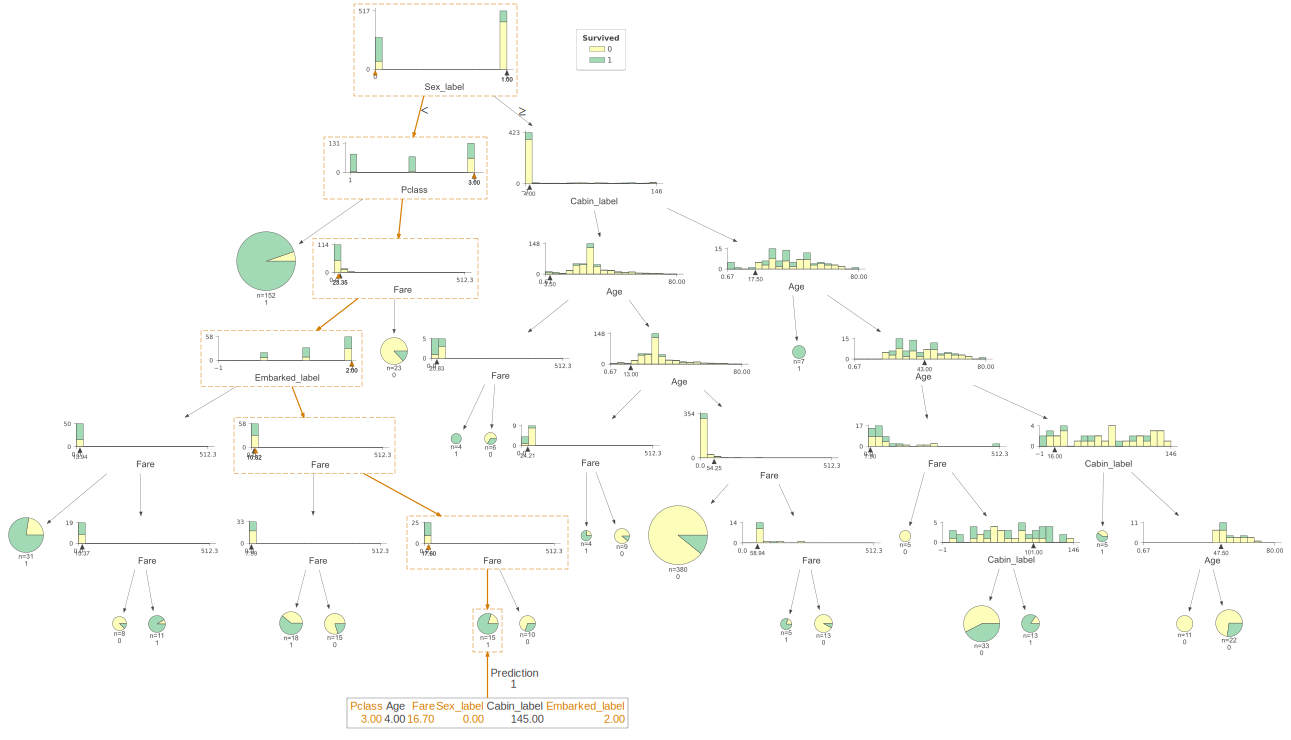

In [35]:
treeviz.dtreeviz(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1, show_just_path=False, X=X)

# Visualisations regressor